In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('../dataset/diagnosed_cbc_data_v4.csv')
df.shape

(1281, 15)

Suppression des diagnosis sous représentés 

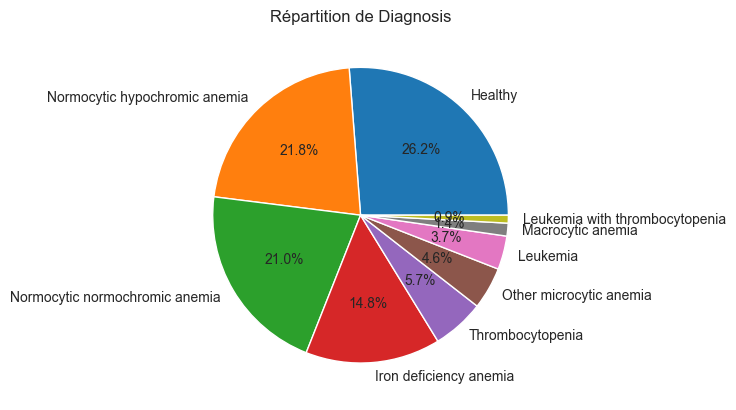

In [68]:
plt.pie(df['Diagnosis'].value_counts(), labels=df['Diagnosis'].value_counts().index, autopct='%1.1f%%')
plt.title('Répartition de Diagnosis')
plt.show()

In [69]:
delete = ["Leukemia with thrombocytopenia", "Macrocytic anemia", "Leukemia", "Other microcytic anemia"]
df = df[~df['Diagnosis'].isin(delete)]

Suppression des variables réparties de manière étrange

In [70]:
delete = ["LYMn", "LYMp", "NEUTp", "NEUTn", "HCT", "PDW", "PCT"]
df = df.drop(columns=delete)

Suppression des valeurs aberrantes

In [71]:
from scipy import stats

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df_no_outliers_z = df[(z_scores < 3).all(axis=1)]
df = df_no_outliers_z.drop(df_no_outliers_z[df_no_outliers_z['MCH'] > 50].index)

Export du jeu de données


In [72]:
df.to_csv("../dataset/data_cleaned.csv", index=False)